In [2]:
import pandas as pd
import numpy as np

subpath = "distrib_experiment_y_original_k_fold/2025-02-20T21:51:58"
data = pd.read_csv(f'{subpath}/minimal_with_univariate.csv', index_col=False)


In [3]:
data[data['período'] == 8].sort_values(by=['carga', 'apps', 'método'], ascending=False)

,período,carga,apps,feature,método,nmae
46,8,PeriodicLoad,SingleApp,DispFrames,RT,0.108752
47,8,PeriodicLoad,SingleApp,DispFrames,RF,0.098759
22,8,PeriodicLoad,BothApps,DispFrames,RT,0.157754
23,8,PeriodicLoad,BothApps,DispFrames,RF,0.146076
34,8,FlashcrowdLoad,SingleApp,DispFrames,RT,0.112265
35,8,FlashcrowdLoad,SingleApp,DispFrames,RF,0.107388
10,8,FlashcrowdLoad,BothApps,DispFrames,RT,0.119132
11,8,FlashcrowdLoad,BothApps,DispFrames,RF,0.106738


In [4]:
import scipy.stats as st

group = data.groupby(["período"])['nmae'].agg(['mean', 'std', 'count']).reset_index()
# Compute standard error
group['se'] = group['std'] / np.sqrt(group['count'])

# Compute 95% confidence interval using t-student distribution
group['ci'] = group.apply(lambda row: st.t.ppf(0.975, df=row['count']-1) * row['se'], axis=1)

# Print results as "mean ± ci"
for _, row in group.iterrows():
  print(f"{row['período']}: {row['mean']:.3f} ± {row['ci']:.3f}")


8.0: 0.120 ± 0.018
16.0: 0.116 ± 0.016
32.0: 0.114 ± 0.014
64.0: 0.115 ± 0.012
128.0: 0.114 ± 0.016
256.0: 0.130 ± 0.035


In [5]:
group = data.groupby(["período"])['nmae'].agg(['mean', 'std']).reset_index()

In [6]:
group['std'] = round(100*group['std'], 0)
group['mean'] = round(100*group['mean'], 0)

In [7]:
group

,período,mean,std
0,8,12.0,2.0
1,16,12.0,2.0
2,32,11.0,2.0
3,64,12.0,1.0
4,128,11.0,2.0
5,256,13.0,4.0


In [8]:
new_data = pd.DataFrame({'período': [1], 'mean': [12], 'std': [2]})

total_table = pd.concat([group, new_data], ignore_index=True)


In [9]:
total_table.set_index('período', inplace=True)

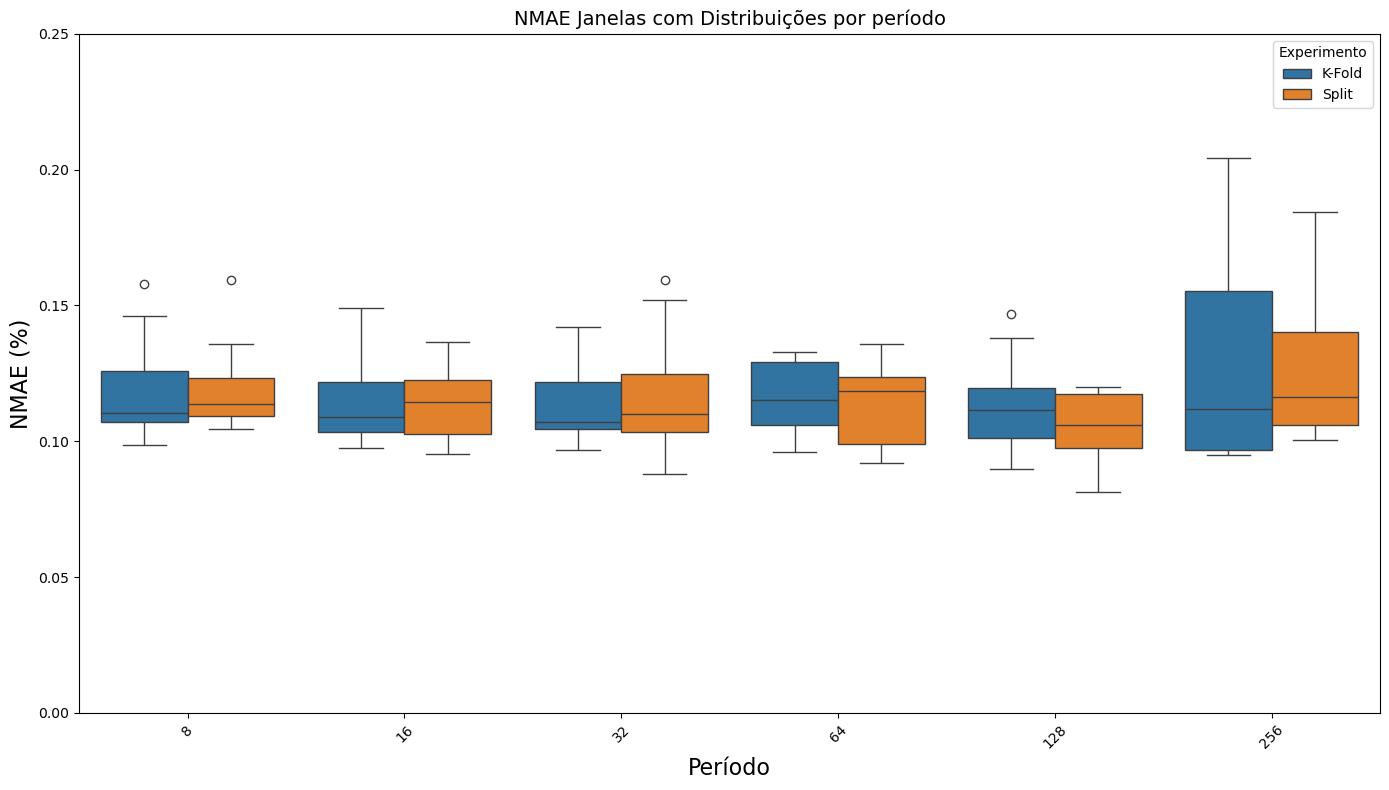

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

reference_split = pd.read_csv(f'distrib_experiment_y_original/2025-01-05T17:06:02/minimal_with_univariate.csv', index_col=False)
#reference_tptt = pd.read_csv(f'distrib_tptt_experiment_y_original/2025-01-20T17:47:12/minimal_with_univariate.csv', index_col=False)

data['Experimento'] = 'K-Fold'
reference_split['Experimento'] = 'Split'
#reference_tptt['Experimento'] = 'TPTT'
data_combined = pd.concat([data, reference_split], ignore_index=True)


plt.figure(figsize=(14, 8))
sns.boxplot(x='período', y='nmae', data=data_combined, hue='Experimento')

plt.xlabel("Período", fontsize=16)
plt.ylabel("NMAE (%)", fontsize=16)
plt.title("NMAE Janelas com Distribuições por período", fontsize=14)
plt.xticks(rotation=45)
plt.ylim((0, 0.25))

plt.tight_layout()

plt.show()

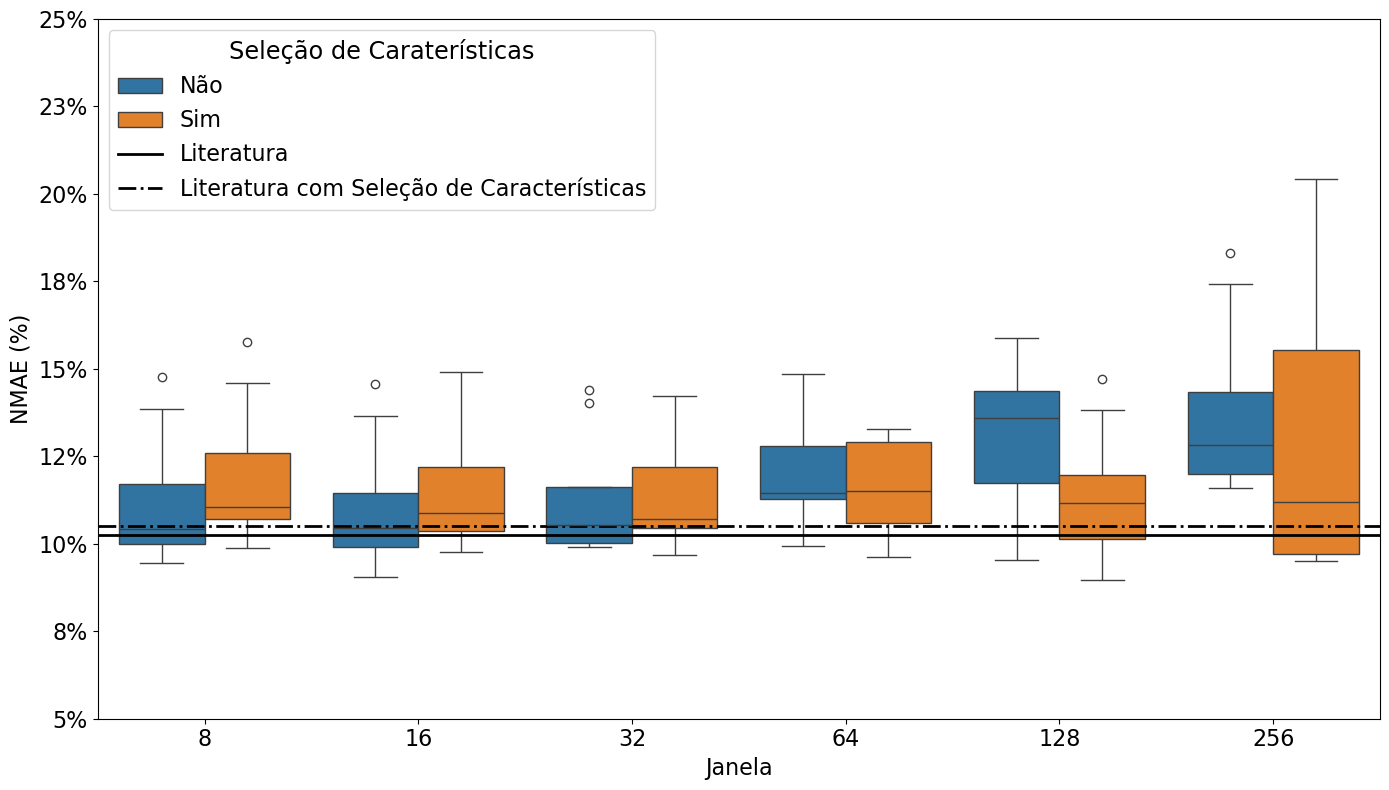

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


total_X = pd.read_csv(f'distrib_experiment_y_original_k_fold/2025-02-20T21:51:58/total_X.csv', index_col=False)

data['Seleção de Caraterísticas'] = 'Sim'
total_X['Seleção de Caraterísticas'] = 'Não'
data_combined = pd.concat([total_X, data], ignore_index=True)


plt.figure(figsize=(14, 8))
sns.boxplot(x='período', y='nmae', data=data_combined, hue='Seleção de Caraterísticas')
plt.axhline(y=0.1025, color='black', linestyle='-', linewidth=2, label='Literatura')
plt.axhline(y=0.105, color='black', linestyle='-.', linewidth=2, label='Literatura com Seleção de Características')


plt.xlabel("Janela", fontsize=16)
plt.ylabel("NMAE (%)", fontsize=16)
#plt.title("NMAE Janelas com Distribuições por período", fontsize=14)
plt.xticks(fontsize=16)
plt.ylim((0.05, 0.25))
plt.yticks(fontsize=16)

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.rcParams['legend.title_fontsize'] = 'xx-large'

plt.legend(title='Seleção de Caraterísticas', prop={'size': 16})

plt.tight_layout()

plt.show()

In [97]:
group_by_method = data.groupby(["período", "método"])['nmae'].agg(['mean', 'std']).reset_index()

In [98]:
group_by_method['std'] = round(100*group_by_method['std'], 0)
group_by_method['mean'] = round(100*group_by_method['mean'], 0)

In [99]:
group_by_method

,período,método,mean,std
0,8,RF,10.0,2.0
1,8,RT,9.0,2.0
2,16,RF,11.0,2.0
3,16,RT,11.0,2.0
4,32,RF,12.0,3.0
5,32,RT,12.0,3.0
6,64,RF,12.0,1.0
7,64,RT,12.0,1.0
8,128,RF,13.0,5.0
9,128,RT,13.0,5.0


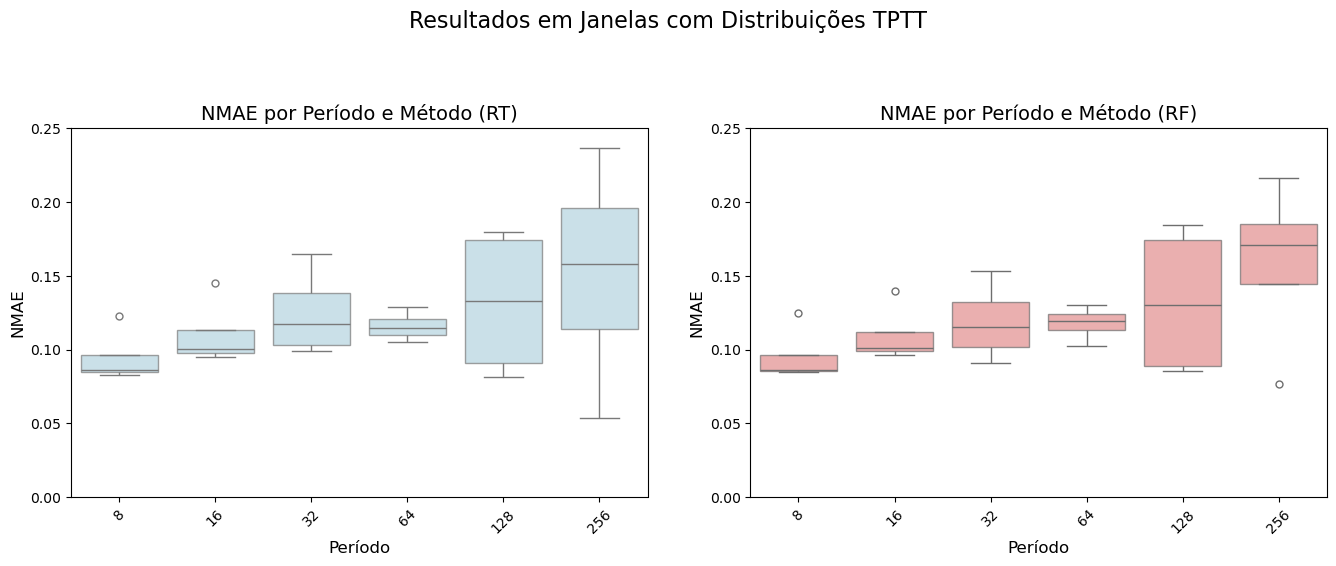

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

y_limits = (0, 0.25)

sns.boxplot(x='período', y='nmae', data=data[data['método'] == 'RT'],
            color="lightblue", boxprops=dict(alpha=0.7), fliersize=5, ax=axes[0])
axes[0].set_ylim(y_limits)
axes[0].set_xlabel("Período", fontsize=12)
axes[0].set_ylabel("NMAE", fontsize=12)
axes[0].set_title("NMAE por Período e Método (RT)", fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=10)
axes[0].tick_params(axis='y', labelsize=10)

sns.boxplot(x='período', y='nmae', data=data[data['método'] == 'RF'],
            color="lightcoral", boxprops=dict(alpha=0.7), fliersize=5, ax=axes[1])
axes[1].set_ylim(y_limits)
axes[1].set_xlabel("Período", fontsize=12)
axes[1].set_ylabel("NMAE", fontsize=12)
axes[1].set_title("NMAE por Período e Método (RF)", fontsize=14)
axes[1].tick_params(axis='x', rotation=45, labelsize=10)
axes[1].tick_params(axis='y', labelsize=10)

fig.suptitle("Resultados em Janelas com Distribuições TPTT", fontsize=16)

plt.tight_layout(pad=3.0)

plt.show()


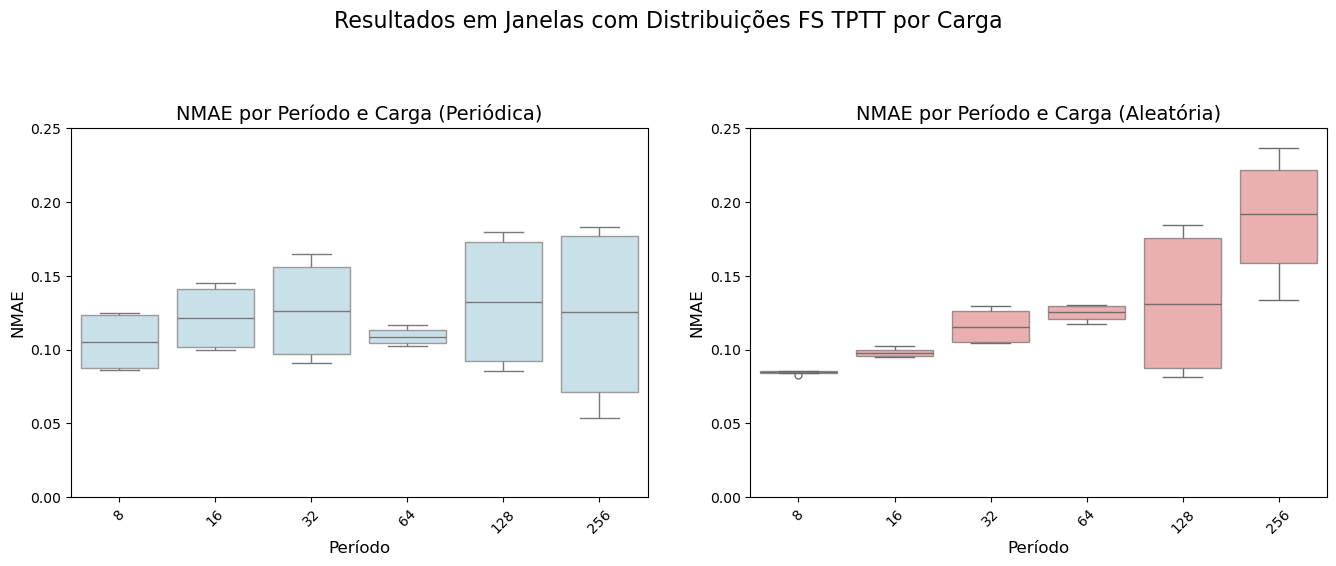

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

y_limits = (0, 0.25)

sns.boxplot(x='período', y='nmae', data=data[data['carga'] == 'PeriodicLoad'],
            color="lightblue", boxprops=dict(alpha=0.7), fliersize=5, ax=axes[0])
axes[0].set_ylim(y_limits)
axes[0].set_xlabel("Período", fontsize=12)
axes[0].set_ylabel("NMAE", fontsize=12)
axes[0].set_title("NMAE por Período e Carga (Periódica)", fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=10)
axes[0].tick_params(axis='y', labelsize=10)

sns.boxplot(x='período', y='nmae', data=data[data['carga'] == 'FlashcrowdLoad'],
            color="lightcoral", boxprops=dict(alpha=0.7), fliersize=5, ax=axes[1])
axes[1].set_ylim(y_limits)
axes[1].set_xlabel("Período", fontsize=12)
axes[1].set_ylabel("NMAE", fontsize=12)
axes[1].set_title("NMAE por Período e Carga (Aleatória)", fontsize=14)
axes[1].tick_params(axis='x', rotation=45, labelsize=10)
axes[1].tick_params(axis='y', labelsize=10)

fig.suptitle("Resultados em Janelas com Distribuições FS TPTT por Carga", fontsize=16)

plt.tight_layout(pad=3.0)

plt.show()
